In [1]:
# Import required libraries

In [2]:
from zipfile import ZipFile
file_name = "/content/ForAiClass 2.zip"
 
with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done')

Done


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/ForAiClass 2',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')


Found 52 images belonging to 2 classes.


In [ ]:
# create a Sequential model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()

# add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# add flatten layer
model.add(Flatten())

# add fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# set up data generators
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/ForAiClass 2',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        classes=['motif0', 'motif1'])

# train the model
model.fit(
        train_generator,
        epochs=10,
        steps_per_epoch=100,
        verbose=1)
model.summary()


Found 52 images belonging to 2 classes.
Epoch 1/10
  2/100 [..............................] - ETA: 6:05 - loss: 3.7869 - accuracy: 0.4615

100/100 [==============================] - 8s 38ms/step - loss: 3.7869 - accuracy: 0.4615
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 128)       73856     
                              

In [ ]:
# predict the class label

In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image

# load the image to be predicted
img = image.load_img('/content/ForAiClass 2/motif0/084.PNG', target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)


prediction = model.predict(img_array)

if prediction[0][0] == 0:
    print("The image contains a 'bull with lower head motif'")
else:
    print("The image does not contain a 'bull with lower head motif'")


1/1 [==============================] - 0s 256ms/step
The image does not contain a 'bull with lower head motif'


1/1 [==============================] - 0s 68ms/step


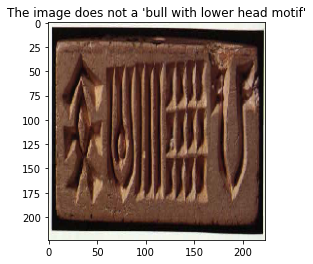

In [10]:
import matplotlib.pyplot as plt

# load the image to be predicted
img = image.load_img('/content/ForAiClass 2/motif1/832.PNG', target_size=(224, 224))

# predict the class label
prediction = model.predict(img_array)

# display the image and prediction
plt.imshow(img)
if prediction[0][0] == 0:
    plt.title("The image contains a 'bull with lower head motif'")
else:
    plt.title("The image does not a 'bull with lower head motif'")
plt.show()



1/1 [==============================] - 0s 122ms/step


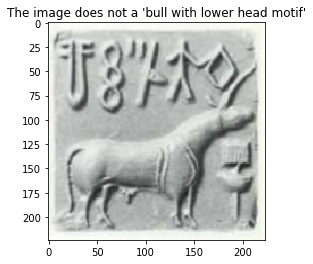

In [12]:
import matplotlib.pyplot as plt

# load the image to be predicted
img = image.load_img('/content/ForAiClass 1/099.PNG', target_size=(224, 224))

# predict the class label
prediction = model.predict(img_array)

# display the image and prediction
plt.imshow(img)
if prediction[0][0] == 0:
    plt.title("The image contains a 'bull with lower head motif'")
else:
    plt.title("The image does not a 'bull with lower head motif'")
plt.show()


In [ ]:
# Saving the model

In [11]:
from tensorflow import keras
model.save('C:/model.h5')

1/1 [==============================] - 0s 129ms/step


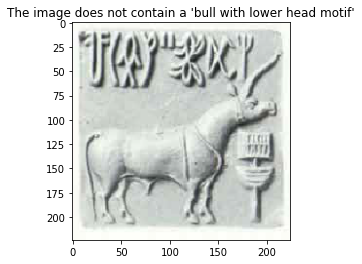

In [48]:
from tensorflow.keras.preprocessing import image

# load the image to be predicted
img = image.load_img('/content/ForAiClass 1/081.PNG', target_size=(224, 224))

# convert the image to a numpy array
img_array = image.img_to_array(img)

# add an extra dimension to the array to represent the batch size
img_array = tf.expand_dims(img_array, 0)

# normalize the pixel values (rescale them to values between 0 and 1)
img_array /= 255.

# predict the class label
prediction = model.predict(img_array)

# display the image and prediction
plt.imshow(img)
if prediction[0][0] == 0:
    plt.title("The image contains a 'bull with lower head motif'")
else:
    plt.title("The image does not contain a 'bull with lower head motif'")
plt.show()


1/1 [==============================] - 0s 63ms/step


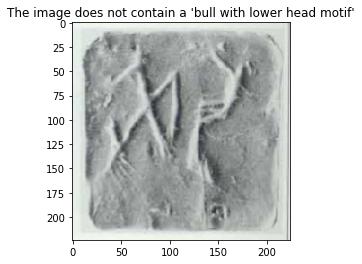

In [49]:
from tensorflow.keras.preprocessing import image

# load the image to be predicted
img = image.load_img('/content/ForAiClass 1/632.PNG', target_size=(224, 224))

# convert the image to a numpy array
img_array = image.img_to_array(img)

# add an extra dimension to the array to represent the batch size
img_array = tf.expand_dims(img_array, 0)

# normalize the pixel values (rescale them to values between 0 and 1)
img_array /= 255.

# predict the class label
prediction = model.predict(img_array)

# display the image and prediction
plt.imshow(img)
if prediction[0][0] == 0:
    plt.title("The image contains a 'bull with lower head motif'")
else:
    plt.title("The image does not contain a 'bull with lower head motif'")
plt.show()


1/1 [==============================] - 0s 133ms/step


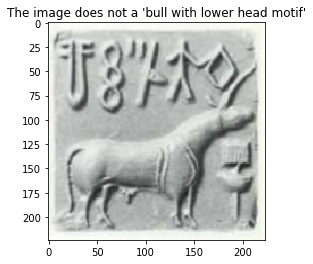

In [16]:
import numpy as np

# load the image to be predicted
img = image.load_img('/content/ForAiClass 1/099.PNG', target_size=(224, 224))

# convert the image to a numpy array
img_array = np.array(img)

# add an extra dimension to the numpy array to make it compatible with the model
img_array = np.expand_dims(img_array, axis=0)

# predict the class label
prediction = model.predict(img_array)

# display the image and prediction
plt.imshow(img)
if prediction[0][0] == 0:
    plt.title("The image contains a 'bull with lower head motif'")
else:
    plt.title("The image does not a 'bull with lower head motif'")
plt.show()


In [32]:
# load the content image
content_img = Image.open('/content/ForAiClass 2/motif0/077.PNG')

# resize the image to the desired size
content_img = content_img.resize(img_size)

# convert the image to an array, remove alpha channel, and add an extra dimension
content_array = np.array(content_img.convert('RGB'))[np.newaxis, ...]

# preprocess the image
content_array = tf.keras.applications.vgg19.preprocess_input(content_array)

outputs = model(content_array)


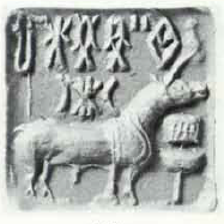

In [34]:

content_img